Lab11 - CNN Basics Convolution

 * Most Widely used for image classification
 * Generally, it consists of convolution layer, pooling layer, and fully connected layer
 * convolution, pooling layer - feature extraction
 * fully connected layer - classification


Convolution 연산에 대해서 지난번 코드에서 살펴보았습니다. 이번에는 Pooling에 대해서 설명하고, 실습합니다.

여러가지 Pooling Method가 있는데, Max Pooling과 Average Pooling이 있습니다. 이 두개가 가장 많이 쓰입니다.

Max Pooling은 최대값을 취합니다. 다른 말로는 Sub sampling이라고도 합니다. 중요한 정보를 뽑아서 Size를 줄였기 때문입니다.

Average Pooling은 평균을 취합니다.

두개 중에서는 Max Pooling이 더 많이 쓰입니다. Convolution 연산의 결과인 Feature Map에서 큰 숫자가 나왔다는 것은 Filter가 찾아내고자 하는 값에 더 가깝다는 것을 의미하기 때문입니다.

tf.keras.layers.MaxPool2D

 * pool_size : pooling 할때의 filter size.(integer or tuple)
 * strides : stride(filter가 이동하는 간격. integer or tuple)
 * padding : "Valid"(padding을 하지 않음), "Same"(Input과 Output의 크기를 동일하게 유지함)
 * data_format : "channels_last" - (batch, height, width, channels)  / "channels_first" - (batch, channels, height, width)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Pooling

In [2]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]],dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2),strides=1,
                              padding='Valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


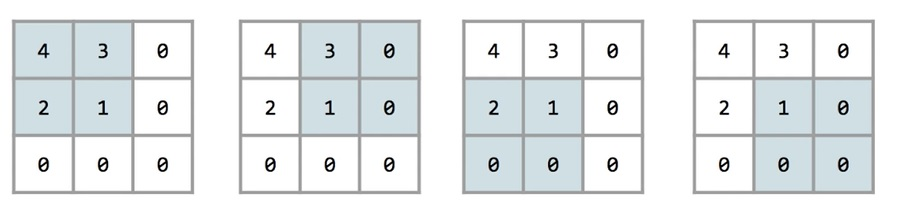

In [5]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]],dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2),strides=1,
                              padding='Same')(image)
print(pool.shape)
print(pool.numpy())

from IPython.display import Image
Image('C:/Users/rsh15/Desktop/same pooling.jpg')

# With MNIST Data

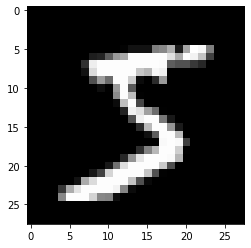

In [9]:
mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255. # scaling

img = train_images[0]
plt.imshow(img,cmap='gray')

(1, 14, 14, 5)


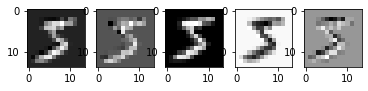

In [10]:
img = img.reshape(-1,28,28,1) # -1은 값을 알아서 채우게 됨. 가장 첫번째니까 batch자리. 이미지 1장이니까 1이 들어가게 됨.
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5,kernel_size=3,strides=(2,2),
                             padding='Same',kernel_initializer=weight_init)(img)
print(conv2d.shape)

feature_maps = np.swapaxes(conv2d,0,3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14),cmap='gray')

(1, 7, 7, 5)


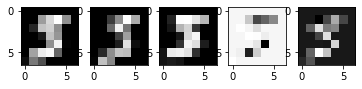

In [11]:
pool = keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),
                              padding='Same')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool,0,3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7),cmap='gray')